In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

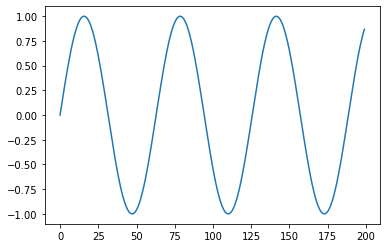

In [2]:
series = np.sin(0.1*np.arange(200))

plt.plot(series)
plt.show()

In [3]:
T = 10
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print ("X.shape: {}, Y.shape".format(X.shape,Y.shape))

X.shape: (190, 10), Y.shape


In [4]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

model.compile(loss = 'mse',optimizer=Adam(lr=0.1))

r = model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:], Y[-N//2:]))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 2ms/sample - loss: 1.4519 - val_loss: 0.0811
Epoch 2/80
95/95 [==============================] - 0s 76us/sample - loss: 0.4754 - val_loss: 0.6830
Epoch 3/80
95/95 [==============================] - 0s 94us/sample - loss: 0.6270 - val_loss: 0.1529
Epoch 4/80
95/95 [==============================] - 0s 79us/sample - loss: 0.0668 - val_loss: 0.0915
Epoch 5/80
95/95 [==============================] - 0s 100us/sample - loss: 0.2213 - val_loss: 0.2581
Epoch 6/80
95/95 [==============================] - 0s 69us/sample - loss: 0.2527 - val_loss: 0.0447
Epoch 7/80
95/95 [==============================] - 0s 67us/sample - loss: 0.0265 - val_loss: 0.0487
Epoch 8/80
95/95 [==============================] - 0s 78us/sample - loss: 0.0882 - val_loss: 0.1231
Epoch 9/80
95/95 [==============================] - 0s 68us/sample 

95/95 [==============================] - 0s 75us/sample - loss: 3.7507e-10 - val_loss: 5.3786e-12
Epoch 74/80
95/95 [==============================] - 0s 95us/sample - loss: 1.4107e-10 - val_loss: 3.1814e-10
Epoch 75/80
95/95 [==============================] - 0s 99us/sample - loss: 1.6471e-10 - val_loss: 5.0341e-11
Epoch 76/80
95/95 [==============================] - 0s 74us/sample - loss: 1.4110e-10 - val_loss: 9.6840e-11
Epoch 77/80
95/95 [==============================] - 0s 87us/sample - loss: 4.0724e-11 - val_loss: 6.2920e-11
Epoch 78/80
95/95 [==============================] - 0s 84us/sample - loss: 7.6505e-11 - val_loss: 7.2179e-12
Epoch 79/80
95/95 [==============================] - 0s 74us/sample - loss: 1.6096e-11 - val_loss: 4.1843e-11
Epoch 80/80
95/95 [==============================] - 0s 81us/sample - loss: 3.3419e-11 - val_loss: 3.1858e-12


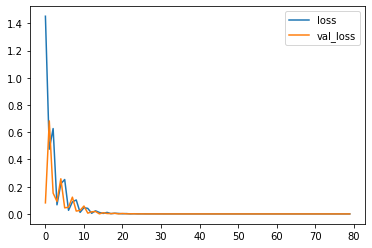

In [5]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

### Wrong way forecasting

In [6]:
# Wrong way of forecasting.
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] # we are using the same x values and not the predicted x values for
    i += 1                                     # later predictions, which is in-correct
    
    validation_predictions.append(p)

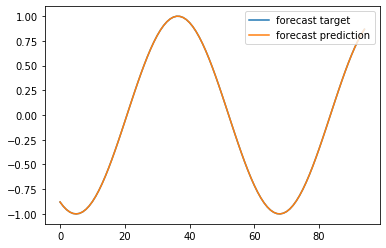

In [7]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()

### Correct way forecasting

In [8]:
validation_target = Y[-N//2:]
validatoin_predictions = []

last_x = X[-N//2] # 1-D array of length T.

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

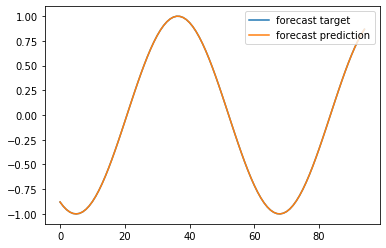

In [9]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()

### Adding noise to a perfect sin wave to see the affect

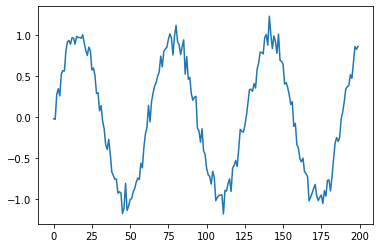

X.shape: (190, 10), Y.shape
Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.1501 - val_loss: 0.0478
Epoch 2/80
95/95 [==============================] - 0s 74us/sample - loss: 0.1125 - val_loss: 0.0424
Epoch 3/80
95/95 [==============================] - 0s 71us/sample - loss: 0.0558 - val_loss: 0.0815
Epoch 4/80
95/95 [==============================] - 0s 84us/sample - loss: 0.0618 - val_loss: 0.0474
Epoch 5/80
95/95 [==============================] - 0s 161us/sample - loss: 0.0555 - val_loss: 0.0421
Epoch 6/80
95/95 [==============================] - 0s 94us/sample - loss: 0.0431 - val_loss: 0.0432
Epoch 7/80
95/95 [==============================] - 0s 89us/sample - loss: 0.0422 - val_loss: 0.0303
Epoch 8/80
95/95 [==============================] - 0s 83us/sample - loss: 0.0368 - val_loss: 0.0347
Epoch 9/80
95/95 [==============================] - 0s 73us/sample - loss: 0.0314 - val_loss: 0.0338
Epoch 10/80
95/95 [

95/95 [==============================] - 0s 85us/sample - loss: 0.0103 - val_loss: 0.0133


In [10]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

T = 10
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)

print ("X.shape: {}, Y.shape".format(X.shape,Y.shape))
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

model.compile(loss = 'mse',optimizer=Adam(lr=0.1)) 

r = model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:], Y[-N//2:]))

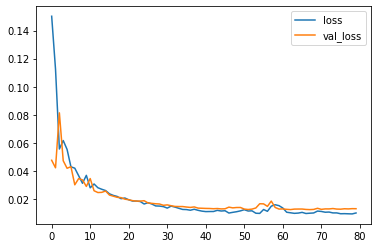

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [12]:
# Wrong way of forecasting.
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] # we are using the same x values and not the predicted x values for
    i += 1                                     # later predictions, which is in-correct
    
    validation_predictions.append(p)

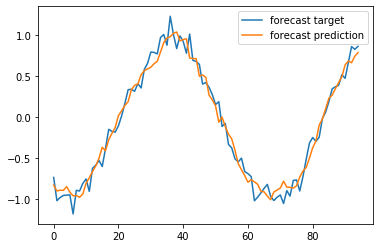

In [13]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()

In [14]:
# Correct way
validation_target = Y[-N//2:]
validatoin_predictions = [] 

last_x = X[-N//2] # 1-D array of length T.

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

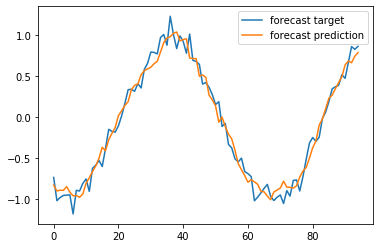

In [15]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()